In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import date, timedelta

In [2]:
stocks = ['AAPL', 'MSFT', 'TSLA', 'NFLX', 'GE', 'AUY', 'PLUG', "SPY", "IWM", "DIA"]
tickers = ['AAPL', 'MSFT', 'TSLA', 'NFLX', 'GE', 'AUY', 'PLUG']
benches = ["SPY", "IWM", "DIA"]
data = yf.download(stocks, start="2020-01-01", end="2020-12-31")["Adj Close"] #ad_close
data

[*********************100%***********************]  10 of 10 completed


,AAPL,AUY,DIA,GE,IWM,MSFT,NFLX,PLUG,SPY,TSLA
Date,,,,,,,,,,
2020-01-02,73.785927,3.705322,275.016571,94.461693,161.172134,156.924393,329.809998,3.240000,312.394989,86.052002
2020-01-03,73.068565,3.676893,272.824982,94.778419,160.540222,154.970398,325.899994,3.230000,310.029541,88.601997
2020-01-06,73.650795,3.667416,273.453766,96.124489,160.754105,155.370972,335.829987,3.820000,311.212250,90.307999
2020-01-07,73.304413,3.724275,272.272186,95.411850,160.219376,153.954376,330.750000,3.810000,310.337280,93.811996
2020-01-08,74.483604,3.515791,273.854034,94.540871,160.715195,156.406586,339.260010,4.080000,311.991211,98.428001
...,...,...,...,...,...,...,...,...,...,...
2020-12-23,129.801285,5.468959,293.324707,86.425797,196.364914,218.222198,514.479980,36.139999,360.056091,645.979980
2020-12-24,130.802338,5.430648,294.045197,84.754585,196.236694,219.930283,513.969971,35.580002,361.456848,661.770020
2020-12-28,135.480560,5.392336,295.972961,84.675003,195.507034,222.112350,519.119995,33.570000,364.562073,663.690002


# Part 1

In [3]:
weight =[1,1,1,1,1,1,1]

## Volatility


In [4]:
returnn = data[tickers].pct_change(66)
volatility = returnn.std()
volatility_annual = (volatility*np.sqrt(252)).to_numpy()
volatility_annual

array([ 3.49940094,  1.84446481,  8.10818243,  1.98081315,  5.8116494 ,
        4.11938487, 10.37034696])

## total & annual return

Daily_pct_change = todays_price - yesterdays_price/yesterdays_price *100

annualized% = need to multiply our daily standard deviation by the square root of 252

In [5]:
data2 = yf.download(stocks, period ='10y')["Adj Close"]
annualized_pct= ((data2[tickers].pct_change(len(data2)-1).iloc[-1])*np.sqrt(252)).to_numpy()
total_return = (data2[tickers].pct_change(len(data2)-1).iloc[-1]).to_numpy()
print(annualized_pct,total_return)

[*********************100%***********************]  10 of 10 completed
[ 117.61283721  159.61844871 2099.58741098  295.21871516   -7.12792266
   -9.59842856  236.94429742] [  7.40891234  10.05501714 132.26157489  18.59703102  -0.44901692
  -0.60464417  14.92608775]


## Beta
Beta is a measure of a stock’s volatility in relation to the overall market (S&P 500). The S&P 500 index has Beta 1.
High-beta stocks are supposed to be riskier but provide higher potential return. While, low-beta stocks pose less risk but also lower returns.

**Beta above 1: stock is more volatile than the market, but expects higher return.**
**Beta below 1: stock with lower volatility, and expects less return.**

In [6]:
log_returns = np.log(data/data.shift())
cov = log_returns.cov()
beta_SPY =[]
beta_IWM = []
beta_DIA = []
for stock in tickers:
    var = log_returns[stock].var()
    for bench in benches:
        beta = cov.loc[bench, stock]/var
        if bench == 'SPY':
            beta_SPY.append(beta)
        if bench == 'IWM':
            beta_IWM.append(beta)
        if bench =='DIA':
            beta_DIA.append(beta)

## Max Drawdown — 
The worst possible return one could see, if they had bought high and sold low.
Maximum drawdown measures the maximum fall in the value of the investment, as given by the difference between the value of the lowest trough and that of the highest peak before the trough.

In [7]:
def Max_drawdown(df, window=5, draw_type = 'max') :
    if draw_type =='avg':
         Roll_Max = df.rolling(window,min_periods=1).mean()
    else:
        Roll_Max = df.rolling(window,min_periods=1).max()
        
    Daily_Drawdown= df/Roll_Max -1

    Max_Daily_Drawdown = Daily_Drawdown.rolling(window, min_periods=1).min()
    
    return Max_Daily_Drawdown

In [8]:
max_drawdown = (Max_drawdown(data[tickers]).resample('Y').mean()).to_numpy()
max_drawdown

array([[-0.04105442, -0.03968374, -0.0813381 , -0.04553247, -0.07227611,
        -0.06962733, -0.08661327]])

In [9]:
avg_drawdown = (Max_drawdown(data[tickers], draw_type = 'avg').resample('Y').mean()).to_numpy()
avg_drawdown

array([[-0.01827055, -0.01752701, -0.03405567, -0.02041568, -0.0343981 ,
        -0.03321463, -0.03533574]])

Here we got the logarithmic return, or continuously compounded return. This return is the nominal return with the interest compounding every millisecond. To see how it is close to effective interest rate. Here we calculated the daily logarithmic return.

In [10]:
annualized_pct

array([ 117.61283721,  159.61844871, 2099.58741098,  295.21871516,
         -7.12792266,   -9.59842856,  236.94429742])

#annulaized return

Annualized Return=(1+Cumulative Return)^(365/Days Held)	 −1

In [11]:
vals = {'Tickers': tickers, "Weight": weight, "annual_volatility":volatility_annual, "beta_SPY":beta_SPY, "beta_IWM":beta_IWM,
       "beta_DIA": beta_DIA, "avg_draw":avg_drawdown[0], "max_draw":max_drawdown[0], "Total_Return": total_return,
        "Annualized_return":annualized_pct}
risk_table = pd.DataFrame(vals)
risk_table

,Tickers,Weight,annual_volatility,beta_SPY,beta_IWM,beta_DIA,avg_draw,max_draw,Total_Return,Annualized_return
0,AAPL,1,3.499401,0.600835,0.583039,0.613053,-0.018271,-0.041054,7.408912,117.612837
1,MSFT,1,1.844465,0.670543,0.656226,0.686988,-0.017527,-0.039684,10.055017,159.618449
2,TSLA,1,8.108182,0.185986,0.214847,0.187836,-0.034056,-0.081338,132.261575,2099.587411
3,NFLX,1,1.980813,0.359710,0.334870,0.336625,-0.020416,-0.045532,18.597031,295.218715
4,GE,1,5.811649,0.369178,0.486224,0.434747,-0.034398,-0.072276,-0.449017,-7.127923
5,AUY,1,4.119385,0.143554,0.146942,0.137052,-0.033215,-0.069627,-0.604644,-9.598429
6,PLUG,1,10.370347,0.175357,0.230744,0.192523,-0.035336,-0.086613,14.926088,236.944297


# part 2
Portfolio Risk against 3 ETF's

In [12]:
#column1:
benches = ["SPY", "IWM", "DIA"]

# correlation
Because I'm looking at my stocks as whole I would like to compare the mean of the daily return of all of them and see how correlated they are with the benchmarks. I take the daily return of the stocks and take the mean of all of them combined. Then I take the daily retun of the benchmark and compare the two. To calculate the correlation I first need the covariance. The scatter plot shows a positive correlation among the two variables

/Users/jenifervivar/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


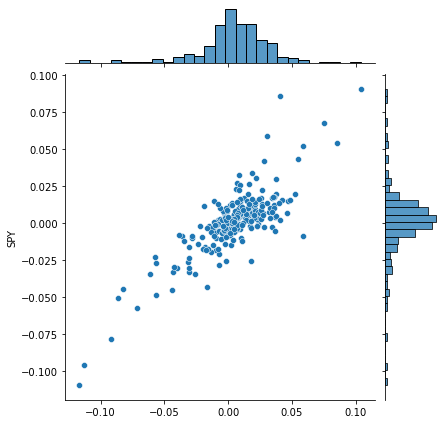

In [78]:
p = data[tickers].pct_change().mean(axis = 1).dropna()
t = data[benches[0]].pct_change().dropna()
sns.jointplot(p, t)

In [79]:
from scipy import stats
corr, p_val =  stats.pearsonr(p,t)

(0.8218127151548962, 9.008830447818247e-63)

In [86]:

corr =[]
portf_return = (data[tickers].pct_change().mean(axis = 1)).dropna()
for bench in benches:
    etf_return =data[bench].pct_change().dropna()
    #cov_ = np.cov(portf_return[1], etf_return[1])
    corr_, _ = stats.pearsonr(portf_return, etf_return)
    corr.append(corr_)

The values in the portfoli seem to be well correlated to the values in the benchmarks. This means that the stocks in the portfolio are generally good because the correlation values are closer to one

In [87]:
print(corr)

[0.8218127151548962, 0.757716837567611, 0.787077199692848]


# covariance

In [104]:
(data[tickers].pct_change().cov())

,AAPL,MSFT,TSLA,NFLX,GE,AUY,PLUG
AAPL,0.000868,0.000686,0.000786,0.000482,0.000483,0.000298,0.000726
MSFT,0.000686,0.000769,0.000791,0.000484,0.000495,0.000268,0.000744
TSLA,0.000786,0.000791,0.003188,0.000696,0.000539,0.000633,0.001328
NFLX,0.000482,0.000484,0.000696,0.000850,0.000121,0.000244,0.000600
GE,0.000483,0.000495,0.000539,0.000121,0.001580,0.000078,0.000875
AUY,0.000298,0.000268,0.000633,0.000244,0.000078,0.001721,0.000629
PLUG,0.000726,0.000744,0.001328,0.000600,0.000875,0.000629,0.003788


# Tracking Errors 
In finance, tracking error or active risk is a measure of the risk in an investment portfolio that is due to active management decisions made by the portfolio manager; it indicates how closely a portfolio follows the index to which it is benchmarked.

**Tracking Error = Standard Deviation of (P - B)**

Where P is portfolio return and B is benchmark return

In [124]:
tracking_Errors = []
portf_return = (data2[tickers].pct_change().mean(axis = 1)).dropna()
for bench in benches:
    etf_return =data2[bench].pct_change().dropna()
    TErr = np.std(portf_return-etf_return)
    tracking_Errors.append(TErr)
tracking_Errors

[0.012836935659934913, 0.013386314941813613, 0.013782120082751311]

#  Sharpe Ratio
is used to help investors understand the return of an investment compared to its risk. The ratio is the average return earned in excess of the risk-free rate per unit of volatility or total risk. Volatility is a measure of the price fluctuations of an asset or portfolio.
 
SR  = R_p-R_f/std_P

R_f =  -6.26% (https://www.forbes.com/advisor/investing/risk-free-rate/)


In [117]:
sharpe_r = []

R_f =  -0.0626
for bench in benches:
    etf_return =data[bench].pct_change().dropna()
    SR =(etf_return - R_f).mean()/(etf_return).std()
    sharpe_r.append(SR)
    

In [ ]:
log_return = np.sum(np.log(data/data.shift())*portfolio, axis=1)
sharpe_ratio = log_return.mean()/log_return.std()

# Anualized Volatility

# table so far

In [126]:
data_2 = {'ETF':benches, "Correlation": corr, "tracking_error":tracking_Errors,"Sharpe_ratio":sharpe_r}
risk_vs_ETF = pd.DataFrame(data_2)
risk_vs_ETF

,ETF,Correlation,tracking_error,Sharpe_ratio
0,SPY,0.821813,0.012837,3.004500
1,IWM,0.757717,0.013386,2.488645
2,DIA,0.787077,0.013782,2.738172
